# HSQL to Unidades Vecinales

This notebook creates __santiago_unidadesvecinales_hqsl_4_5_kmh__, which has HQSL mean data for all Unidades Vecinales in Santiago, Chile.

## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Notebook config

In [2]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = True
# How to save?
if_exists='replace'

##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

In [3]:
# 'alex' or 'edgar'
all_local_dirs = 'edgar'
# Output hexs resolution
res = 10

In [4]:
if all_local_dirs == 'alex':
    grl_dir = "../../../data/external/temporal_todocker/santiago/proximidad/"
elif all_local_dirs == 'edgar':
    grl_dir = "../../../data/processed/santiago/"
else:
    print("WARNING: Fix all_local_dirs variable")

## Download data

In [5]:
query = f'SELECT * FROM projects_research.santiago_hexproximity_hqsl_4_5_kmh_pub WHERE res = {res}'
hex_gdf = aup.gdf_from_query(query)

# Show
print(hex_gdf.shape)
hex_gdf.head(1)

(63727, 201)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,culture_count,greenspace_count,entertainment_count,enjoying_count,education_count,learning_count,workplaces_count,sustainable_mobility_count,working_count,hqsl
0,8ab2c556d697fff,"POLYGON ((-70.59586 -33.41622, -70.59649 -33.4...",3.707278,4.251,0.621772,5.167667,38.784833,0.001,65.502859,0.001,...,14.16163,7.882002,17.525184,4.946102,32.996476,4.124559,8.641466,27.953463,7.318986,34.025012


## Load data

In [6]:
uv_gdf = gpd.read_file(f"../../../data/processed/santiago/Unidades_Vecinales.shp")
print(uv_gdf.shape)
uv_gdf.head(4)

(3675, 78)


,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,SALUD_ALTA,SALUD_MEDI,SALUD_BAJA,SALUD_SIN_,SALUD_PRIV,SALUD_PUBL,SALUD_OTRO,TOTAL_SALU,per_num,geometry
0,AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO,11,COYHAIQUE,11101,CERRO LA VIRGEN,15,16.3265,11101_15,72,45,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,72.0,"POLYGON ((-71.92013 -45.80636, -71.92012 -45.8..."
1,AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO,11,COYHAIQUE,11101,BALMACEDA,13,68.7332,11101_13,483,292,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,483.0,"POLYGON ((-71.75999 -45.78404, -71.75999 -45.7..."
2,AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO,11,COYHAIQUE,11101,VILLA FREI,34,36.7003,11101_34,163,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.0,"POLYGON ((-72.02131 -45.81552, -72.02347 -45.8..."
3,AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL CAMPO,11,COYHAIQUE,11101,VALLE SIMPSON,16,77.6744,11101_16,336,165,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,336.0,"POLYGON ((-72.07738 -45.71915, -72.08222 -45.7..."


## Hexagon to UV

Source data

In [7]:
source_list = ['supermercado','clinica_priv','clinica_pub',
                   'hospital_priv','hospital_pub',
                   'consult_ado_priv','consult_ado_pub',
                   'club_deportivo','eq_deportivo_pub','eq_deportivo_priv',
                   'tax_collection','civic_office','social_security',
                   'museos_priv','museos_pub','sitios_historicos',
                   'cines','edu_basica_priv',
                   'edu_basica_pub','edu_media_priv','edu_media_pub',
                   'jardin_inf_priv','jardin_inf_pub','edu_especial_priv',
                   'edu_especial_pub','bibliotecas','agua_alcantarillado',
                   'residencia_adumayor','paradas_tp','paradas_tp_tren',
                   'paradas_tp_metro', 'banco','carniceria','farmacia',
                   'hogar', 'librerias','local_mini_market','bakeries',
                   'restaurantes_bar_cafe', 'universidad', 'edu_tecnica',
                   'edu_adultos_priv','edu_adultos_pub','centro_edu_amb',
                   'centro_recyc', 'labs_priv', 'salud_mental', 'bomberos',
                   'correos', 'police', 'vacunatorio_pub', 'vacunatorio_priv',
                   'eleam', 'ferias', 'ciclovias','ep_plaza_small','ep_plaza_big',
               'ndvi_count', 'hotel_count', 'viv_count','viv_social_count',
              'working','caring','learning','supplying','enjoying','living',
              'hqsl']
len(source_list)

68

### Spatial join

In [8]:
uv_gdf = uv_gdf.to_crs("EPSG:4326")

In [14]:
uv_hex = gpd.sjoin(hex_gdf, uv_gdf)
print(uv_hex.shape)
uv_hex.head(4)

(83568, 279)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,FARMACIAS,SALUD_ALTA,SALUD_MEDI,SALUD_BAJA,SALUD_SIN_,SALUD_PRIV,SALUD_PUBL,SALUD_OTRO,TOTAL_SALU,per_num
0,8ab2c556d697fff,"POLYGON ((-70.59586 -33.41622, -70.59649 -33.4...",3.707278,4.251,0.621772,5.167667,38.784833,0.001,65.502859,0.001,...,9.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,18890.0
0,8ab2c556d697fff,"POLYGON ((-70.59586 -33.41622, -70.59649 -33.4...",3.707278,4.251,0.621772,5.167667,38.784833,0.001,65.502859,0.001,...,14.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,17147.0
1,8ab2c550c06ffff,"POLYGON ((-70.77623 -33.38186, -70.77686 -33.3...",33.364680,0.001,43.643197,0.001000,53.773104,0.001,171.802084,0.001,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2980.0
2,8ab2c509460ffff,"POLYGON ((-70.59798 -33.49494, -70.59861 -33.4...",0.000000,0.001,0.000000,0.001000,0.000000,0.001,0.000000,0.001,...,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,3.0,11013.0


### Data processing

In [15]:
cols_join = list(hex_gdf.columns)[2:]
cols_join.remove('res')
cols_join.remove('city')
cols_join.append('COD_UNICO_')

In [16]:
uv_hex = uv_hex[cols_join].copy() #Added this because it tried to calculate mean of geom
uv_hex = uv_hex.groupby(['COD_UNICO_']).mean()
uv_hex = uv_hex.reset_index()
# Merge back to geometry
uv_hqsl = pd.merge(uv_gdf, uv_hex, right_on='COD_UNICO_', left_on='COD_UNICO_', how = 'right')
print(uv_hqsl.shape)
uv_hqsl.head(4)

(1088, 275)


,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,culture_count,greenspace_count,entertainment_count,enjoying_count,education_count,learning_count,workplaces_count,sustainable_mobility_count,working_count,hqsl
0,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,1,1,100.0,13101_1,4198,2125,...,34.641814,8.445386,28.359327,9.085061,43.581838,5.559616,6.211292,28.835471,7.144437,42.558339
1,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,10,10,100.0,13101_10,5009,2439,...,6.912039,7.555781,8.876800,2.918078,42.068591,5.258574,7.007268,20.664400,5.534334,28.390983
2,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,11,11,100.0,13101_11,6879,3358,...,26.179515,7.379710,11.942340,6.283762,43.988270,6.167895,6.297447,22.822770,6.544370,35.868611
3,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,12,12,100.0,13101_12,6762,3449,...,23.373852,8.615341,12.615535,6.064601,42.761613,5.928978,3.975980,23.067375,6.010252,33.543685


<AxesSubplot: >

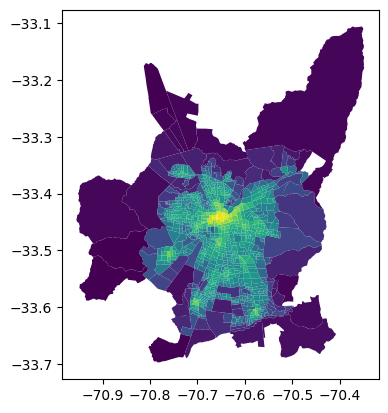

In [17]:
uv_hqsl.plot('hqsl')

## Upload data

In [18]:
aup.gdf_to_db_slow(uv_hqsl, 'santiago_unidadesvecinales_hqsl_4_5_kmh', 'projects_research', if_exists='append')